# Bar Plots

## Two axes combined

In [1]:
# Install and load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbgapi as wb
import matplotlib.patches as patches
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load an example dataset

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/BarPlotsCombineTwoAxes.dta?raw=true")

data2 = data[data.food_group.isin(['animal', 'fruit', 'grain', 'veg', 'starch', 'processed_sugar'])]


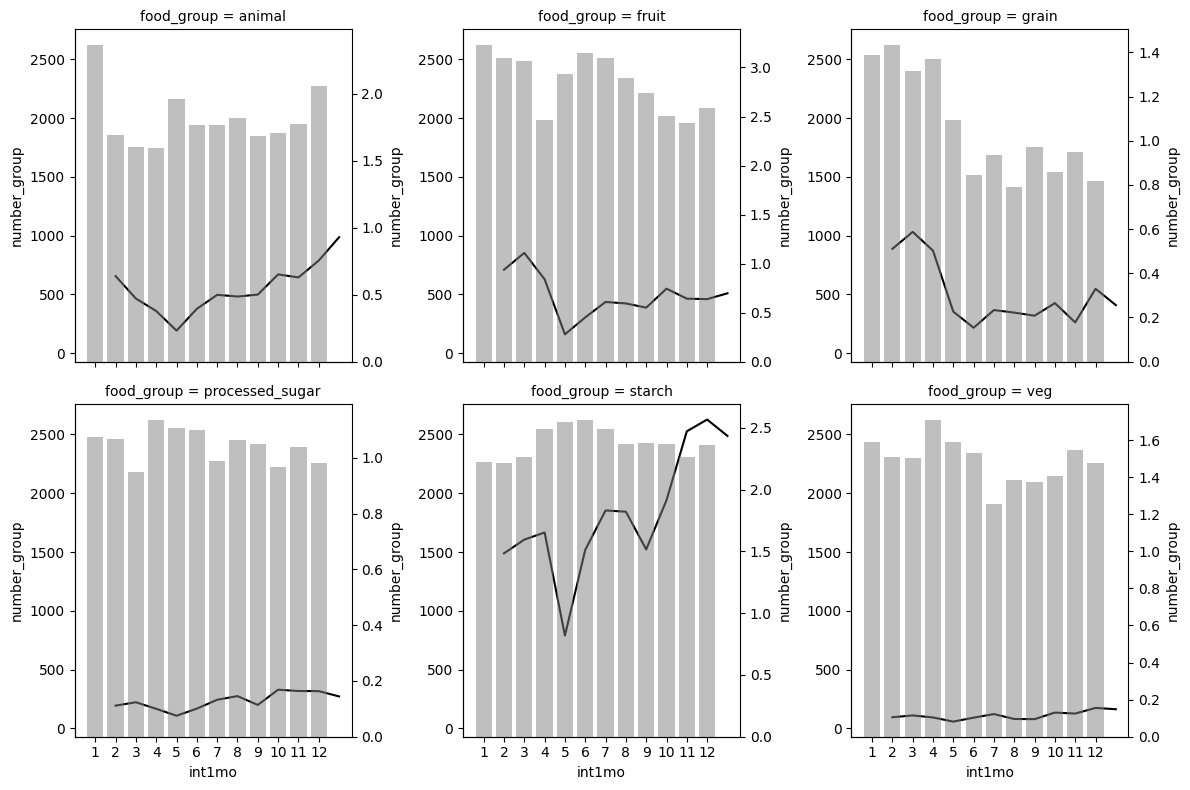

In [4]:
# Plot

def twin_barplot(x,y,color, alpha, **kwargs):
    ax = plt.twinx()
    sns.barplot(x=x,y=y,color=color,alpha = alpha, **kwargs, ax=ax)


g2 = sns.FacetGrid(data2, col = "food_group", height=4, col_wrap=3)

g2.map(sns.lineplot, "int1mo", "total_exp", color = 'black')

g2.map(twin_barplot, "int1mo", "number_group", color = 'grey', alpha = 0.5)

plt.plot();

## Multiple variables

In [4]:
#Load an example dataset

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/BarPlotsMultipleVariables.dta?raw=true")


In [5]:
# Collapse the dataset across each treatment group

data2= (data
       .groupby(['treatment_group'])
       .agg({'treatment_group':'mean', 
             'bl_w_Main_Paddy_Prod':'mean','ml_w_Main_Paddy_Prod':'mean', 
             'bl_w_Spring_Winter_Potato_Prod':'mean', 'ml_w_Spring_Winter_Potato_Prod':'mean',
             'bl_w_Summer_Maize_Prod':'mean', 'ml_w_Summer_Maize_Prod':'mean',
            }))

data2_reset=data2.reset_index(drop=True)


# Reshape data
data3 = pd.melt(data2_reset, id_vars=['treatment_group'])

cond = data3['variable'].str.contains('bl', case = False)
data3['name']= np.where(cond, 'bl', 'ml')

def change (q):
    variable = str(q['variable'])
    if variable == 'ml_w_Main_Paddy_Prod' or 'bl_w_Main_Paddy_Prod':
        if 'Main' in variable:
            return ('Main_Paddy_Prod')
        elif 'Potato' in variable:
            return ('Spring_Winter_Potato_Prod')
        elif 'Maize' in variable:
            return ('Summer_Maize_Prod')
    else:
        pass
data3["variable"] = data3.apply(change, axis=1)

data3['name.group'] = data3.name.astype(str).str.cat(data3[['treatment_group']].astype(str), sep = '.')


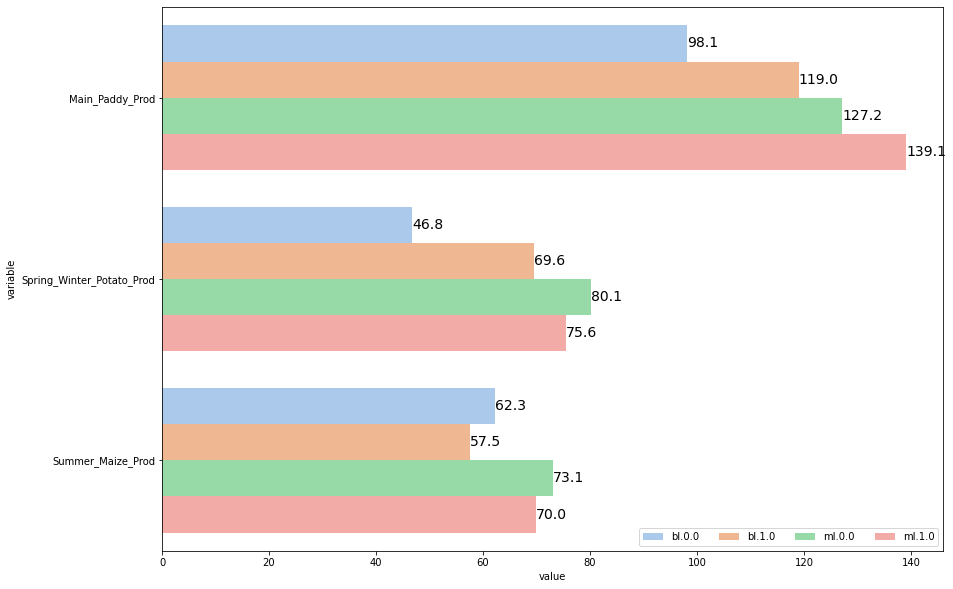

In [6]:
# Plot

plt.figure(figsize=(14,10))

ax = sns.barplot(data = data3, x = 'value', y = 'variable', hue = 'name.group', palette ='pastel')

plt.bar_label(ax.containers[0], fmt='%.1f', fontsize = 14)
plt.bar_label(ax.containers[1], fmt='%.1f', fontsize = 14)
plt.bar_label(ax.containers[2], fmt='%.1f', fontsize = 14)
plt.bar_label(ax.containers[3], fmt='%.1f', fontsize = 14)

plt.legend(loc="lower right", ncol = len(ax.lines))
plt.show()


## Two variables

In [5]:
# Load an example dataset 

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/BarPlotsTwoVariables.dta?raw=true")


In [6]:
# Construct an interaction 

data['sc'] = data.study.astype(str).str.cat(data[['case']].astype(str), sep = '.')


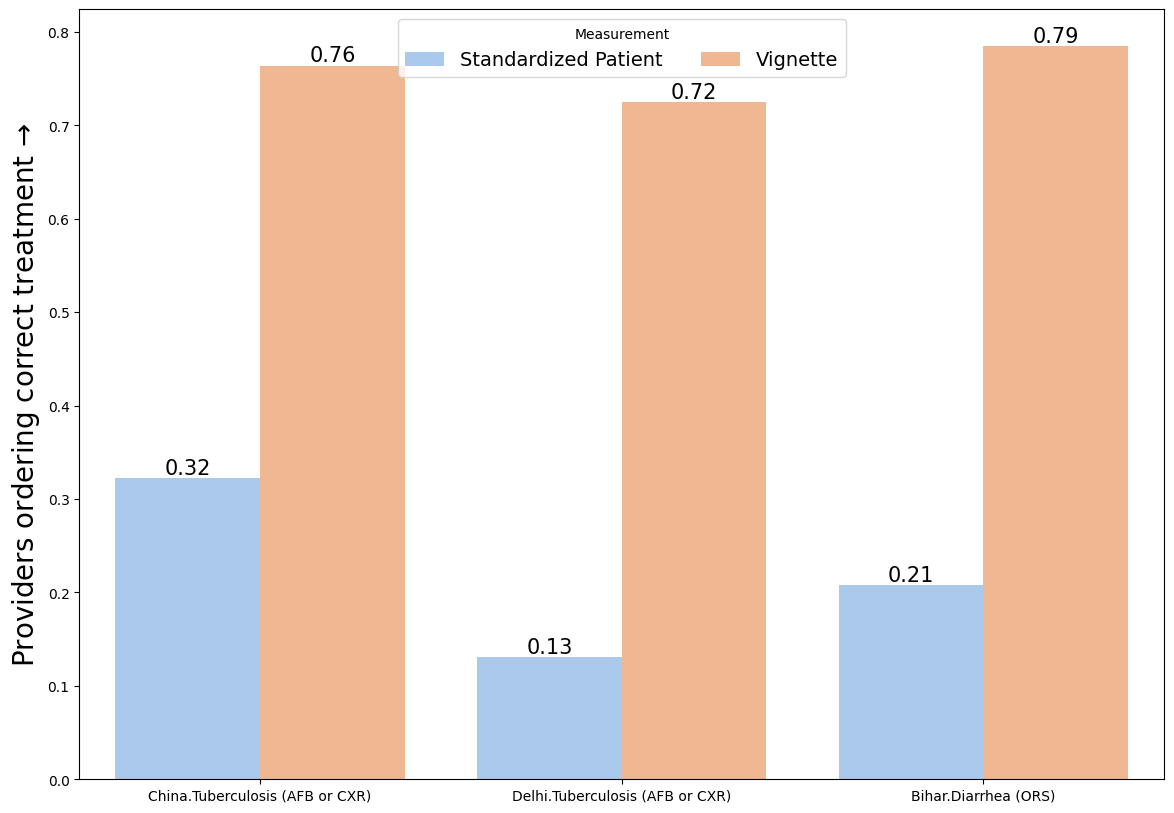

In [7]:
# Plot 

plt.figure(figsize=(14,10))

ax = sns.barplot(data=data, x = 'sc', y = 'treat_correct', hue = 'type', palette = 'pastel')

plt.ylabel('Providers ordering correct treatment $→$', fontsize=20)
plt.xlabel('', fontsize=20)

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 15)
plt.bar_label(ax.containers[1], fmt='%.2f', fontsize = 15)

plt.legend(title = 'Measurement', loc="upper center", ncol = len(ax.lines), fontsize=14)
plt.show()


## Horizontal multiple variables

In [10]:
# Load an example dataset

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/HorizontalBarMultipleVars.dta?raw=true")


In [11]:
# Collapse the dataset across each treatment group

data['refer'] = data['refer'].map({'No': 0, 'Yes': 1})
data[["refer"]] = data[["refer"]].apply(pd.to_numeric)
data['med_class_any_16'] = data['med_class_any_16'].map({'No': 0, 'Steroids': 1})
data[["med_class_any_16"]] = data[["med_class_any_16"]].apply(pd.to_numeric)
data['med_class_any_6'] = data['med_class_any_6'].map({'No': 0, 'Antibiotics': 1})
data[["med_class_any_6"]] = data[["med_class_any_6"]].apply(pd.to_numeric)
data[["med_any"]] = data[["med_any"]].apply(pd.to_numeric)

data2= (data
       .groupby(['facility_type'])
       .agg({'facility_type':'first','as_correct':'mean','ch_correct': 'mean','cp_correct' : 'mean',
             'tb_correct': 'mean', 'med_any': 'mean',
            'checklist': 'mean', 'refer': 'mean', 
            'med_any':'mean', 'med_class_any_6': 'mean',
            'med_class_any_16': 'mean'}))

data2_reset=data2.reset_index(drop=True)


# Reshape data
data3 = pd.melt(data2_reset, id_vars=['facility_type'], value_vars=['as_correct', 'ch_correct', 'cp_correct', 'tb_correct','med_any','checklist','refer','med_class_any_6','med_class_any_16'])

data3["variable"] = data3["variable"].astype("category")
data3["variable"] = data3["variable"].cat.rename_categories(["Asthma: Inhaler/Bronchodilator",
                                                           "Child Diarrhoea: ORS",
                                                             "Checklist",
                                                           "Chest Pain: Referral/Aspirin/ECG",
                                                             "Any medication",
                                                             "Steroids",
                                                             "Antibiotics",
                                                             "Referred (non-diarrhea)",
                                                           "Tuberculosis: AFB Smear"])


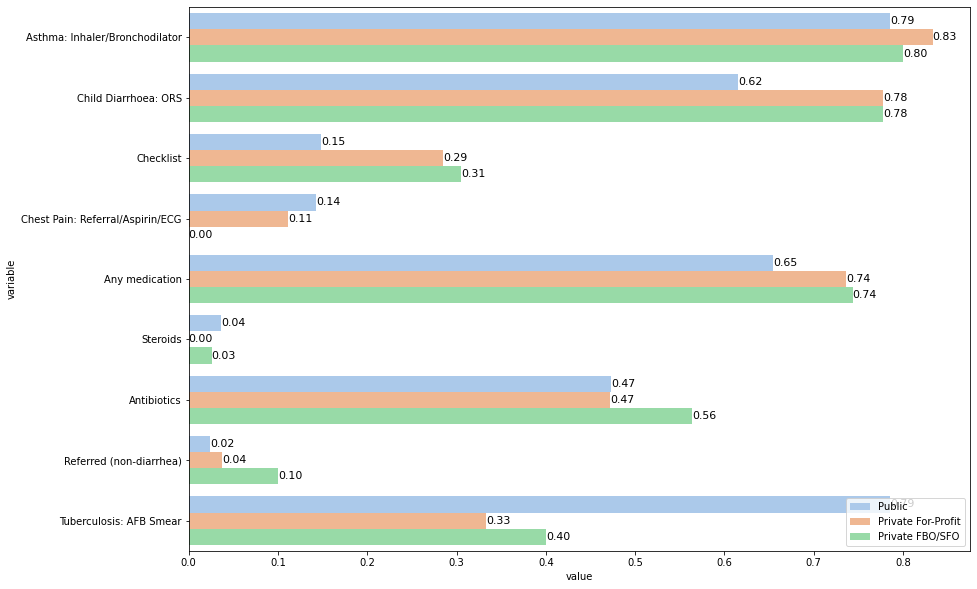

In [12]:
# Plot

plt.figure(figsize=(14,10))

ax = sns.barplot(data=data3, x = 'value', y = 'variable', hue = 'facility_type', palette ='pastel')

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 11)
plt.bar_label(ax.containers[1], fmt='%.2f', fontsize = 11)
plt.bar_label(ax.containers[2], fmt='%.2f', fontsize = 11)

plt.legend(loc="lower right")
plt.show()


## Decreasing order

In [13]:
# Load example datasets 

data = wb.data.DataFrame('NY.GDP.PCAP.KD', time = 2018)
country_code = wb.economy.DataFrame()

data2 = pd.concat([data, country_code], axis=1)

In [14]:
data3 = data2[data2['aggregate'] == False]

data4 = data3.nsmallest(30, 'NY.GDP.PCAP.KD', keep = 'all')

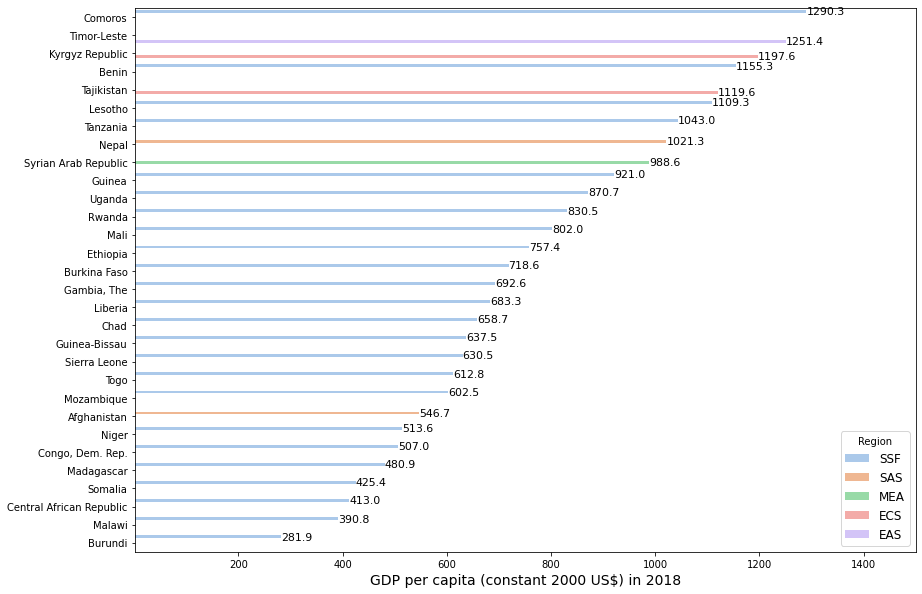

In [15]:
#Plot

plt.figure(figsize=(14,10))

ax = sns.barplot(data=data4, x = 'NY.GDP.PCAP.KD', y = 'name', hue = 'region', 
                 order=data4.sort_values('NY.GDP.PCAP.KD',ascending = False).name,
                palette='pastel')
plt.bar_label(ax.containers[0], fmt='%.1f', fontsize = 11)
plt.bar_label(ax.containers[1], fmt='%.1f', fontsize = 11)
plt.bar_label(ax.containers[2], fmt='%.1f', fontsize = 11)
plt.bar_label(ax.containers[3], fmt='%.1f', fontsize = 11)
plt.bar_label(ax.containers[4], fmt='%.1f', fontsize = 11)

ax.set_xlim(1,1500)

plt.ylabel('')
plt.xlabel('GDP per capita (constant 2000 US$) in 2018', fontsize = 14)
plt.legend(title = 'Region', loc = "lower right", fontsize=12)
plt.show()

## Horizontal bar plot

In [16]:
#  Load example dataset

data1 = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/HorizontalBarPlot1.dta?raw=true")
data2 = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/HorizontalBarPlot2.dta?raw=true")

data = pd.concat([data2, data1], axis=0)


In [17]:
# Collapse data

data4= (data1
       .groupby(['study'])
       .agg({'study':'first','hours':'mean'}))


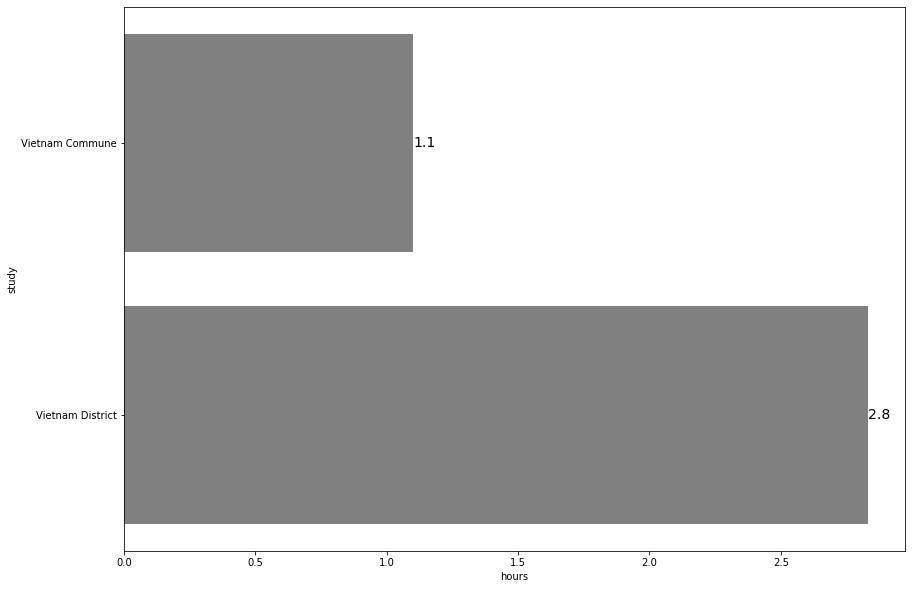

In [18]:
# Plot

plt.figure(figsize=(14,10))

ax = sns.barplot(data = data4, x = 'hours', y = 'study', color = 'grey')

plt.bar_label(ax.containers[0], fmt='%.1f', fontsize = 14)

plt.show()

## Horizontal decreasing order

In [19]:
# Load an example data set

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/HorizontalBetterbar.dta?raw=true")


In [20]:
data['sp1_h1'] = data['sp1_h1'].map({'No': 0, 'Yes': 1})
data[["sp1_h1"]] = data[["sp1_h1"]].apply(pd.to_numeric)

data['sp1_h2'] = data['sp1_h2'].map({'No': 0, 'Yes': 1})
data[["sp1_h2"]] = data[["sp1_h2"]].apply(pd.to_numeric)

data['sp1_h3'] = data['sp1_h3'].map({'No': 0, 'Yes': 1})
data[["sp1_h3"]] = data[["sp1_h3"]].apply(pd.to_numeric)

data['sp1_h4'] = data['sp1_h4'].map({'No': 0, 'Yes': 1})
data[["sp1_h4"]] = data[["sp1_h4"]].apply(pd.to_numeric)

data['sp1_h5'] = data['sp1_h5'].map({'No': 0, 'Yes': 1})
data[["sp1_h5"]] = data[["sp1_h5"]].apply(pd.to_numeric)

data['sp1_h7'] = data['sp1_h7'].map({'No': 0, 'Yes': 1})
data[["sp1_h7"]] = data[["sp1_h7"]].apply(pd.to_numeric)

data['sp1_h8'] = data['sp1_h8'].map({'No': 0, 'Yes': 1})
data[["sp1_h8"]] = data[["sp1_h8"]].apply(pd.to_numeric)

data['sp1_h9'] = data['sp1_h9'].map({'No': 0, 'Yes': 1})
data[["sp1_h9"]] = data[["sp1_h9"]].apply(pd.to_numeric)

data['sp1_h10'] = data['sp1_h10'].map({'No': 0, 'Yes': 1})
data[["sp1_h10"]] = data[["sp1_h10"]].apply(pd.to_numeric)

data['sp1_h11'] = data['sp1_h11'].map({'No': 0, 'Yes': 1})
data[["sp1_h11"]] = data[["sp1_h11"]].apply(pd.to_numeric)

data['sp1_h12'] = data['sp1_h12'].map({'No': 0, 'Yes': 1})
data[["sp1_h12"]] = data[["sp1_h12"]].apply(pd.to_numeric)

data['sp1_h13'] = data['sp1_h13'].map({'No': 0, 'Yes': 1})
data[["sp1_h13"]] = data[["sp1_h13"]].apply(pd.to_numeric)

data['sp1_h14'] = data['sp1_h14'].map({'No': 0, 'Yes': 1})
data[["sp1_h14"]] = data[["sp1_h14"]].apply(pd.to_numeric)

data['sp1_h15'] = data['sp1_h15'].map({'No': 0, 'Yes': 1})
data[["sp1_h15"]] = data[["sp1_h15"]].apply(pd.to_numeric)

data['sp1_h16'] = data['sp1_h16'].map({'No': 0, 'Yes': 1})
data[["sp1_h16"]] = data[["sp1_h16"]].apply(pd.to_numeric)

data['sp1_h17'] = data['sp1_h17'].map({'No': 0, 'Yes': 1})
data[["sp1_h17"]] = data[["sp1_h17"]].apply(pd.to_numeric)

data['sp1_h18'] = data['sp1_h18'].map({'No': 0, 'Yes': 1})
data[["sp1_h18"]] = data[["sp1_h18"]].apply(pd.to_numeric)

data['sp1_h19'] = data['sp1_h19'].map({'No': 0, 'Yes': 1})
data[["sp1_h19"]] = data[["sp1_h19"]].apply(pd.to_numeric)

data['sp1_h20'] = data['sp1_h20'].map({'No': 0, 'Yes': 1})
data[["sp1_h20"]] = data[["sp1_h20"]].apply(pd.to_numeric)

data['sp1_h21'] = data['sp1_h21'].map({'No': 0, 'Yes': 1})
data[["sp1_h21"]] = data[["sp1_h21"]].apply(pd.to_numeric)

data['sp1_e1'] = data['sp1_e1'].map({'No': 0, 'Yes': 1})
data[["sp1_e1"]] = data[["sp1_e1"]].apply(pd.to_numeric)

data['sp1_e2'] = data['sp1_e2'].map({'No': 0, 'Yes': 1})
data[["sp1_e2"]] = data[["sp1_e2"]].apply(pd.to_numeric)

data['sp1_e3'] = data['sp1_e3'].map({'No': 0, 'Yes': 1})
data[["sp1_e3"]] = data[["sp1_e3"]].apply(pd.to_numeric)

data['sp1_e5'] = data['sp1_e5'].map({'No': 0, 'Yes': 1})
data[["sp1_e5"]] = data[["sp1_e5"]].apply(pd.to_numeric)

data['sp1_e6'] = data['sp1_e6'].map({'No': 0, 'Yes': 1})
data[["sp1_e6"]] = data[["sp1_e6"]].apply(pd.to_numeric)

In [21]:
# Select data

data2 = data[["sp1_h1", "sp1_h2", "sp1_h3", "sp1_h4", "sp1_h5", "sp1_h7", "sp1_h8", 
              "sp1_h9", "sp1_h10", "sp1_h11", "sp1_h12", "sp1_h13", "sp1_h14", "sp1_h15",
              "sp1_h16", "sp1_h17", "sp1_h18", "sp1_h19", "sp1_h20", "sp1_h21", 
              "sp1_e1", "sp1_e2", "sp1_e3", "sp1_e5", "sp1_e6"]]


# Collapse data

data3= data2.agg(['mean'])


# Reshape data

data4 = pd.melt(data3, value_vars=["sp1_h1", "sp1_h2", "sp1_h3", "sp1_h4", "sp1_h5", "sp1_h7", "sp1_h8", 
              "sp1_h9", "sp1_h10", "sp1_h11", "sp1_h12", "sp1_h13", "sp1_h14", "sp1_h15",
              "sp1_h16", "sp1_h17", "sp1_h18", "sp1_h19", "sp1_h20", "sp1_h21", 
              "sp1_e1", "sp1_e2", "sp1_e3", "sp1_e5", "sp1_e6"])


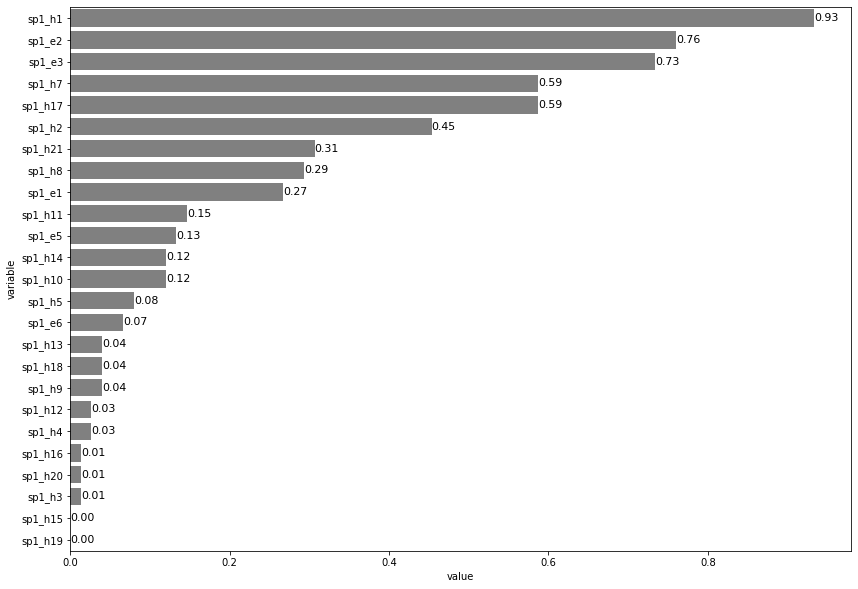

In [22]:
# Plot

plt.figure(figsize=(14,10))

ax = sns.barplot(data = data4, x = 'value', y = 'variable', color = 'grey',
                order=data4.sort_values('value',ascending = False).variable)

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 11)
plt.show()

## Pre-defined error bars

In [23]:
# Load an example dataset

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/HorizontalGroupSE.dta?raw=true")


In [24]:
data['dr_3'] = data['dr_3'].map({'No Referral': 0, 'Referral': 1})
data[["dr_3"]] = data[["dr_3"]].apply(pd.to_numeric)
data['med_b2_any_antibiotic'] = data['med_b2_any_antibiotic'].map({'No Antibiotic': 0, 'Gave Antibiotic': 1})
data[["med_b2_any_antibiotic"]] = data[["med_b2_any_antibiotic"]].apply(pd.to_numeric)
data['med_b2_any_steroid'] = data['med_b2_any_steroid'].map({'No Steroid': 0, 'Gave Steroid': 1})
data[["med_b2_any_steroid"]] = data[["med_b2_any_steroid"]].apply(pd.to_numeric)
data['med_l_any_2'] = data['med_l_any_2'].map({'No': 0, 'Fluoroquinolone': 1})
data[["med_l_any_2"]] = data[["med_l_any_2"]].apply(pd.to_numeric)
data['med_l_any_1'] = data['med_l_any_1'].map({'No': 0})
data[["med_l_any_1"]] = data[["med_l_any_1"]].apply(pd.to_numeric)


In [25]:
# Reshape and collapse data for means

data2= (data
       .groupby(['city'])
       .agg({'city':'first', "dr_3":'mean', 
             "correct_treatment":'mean', "med_b2_any_antibiotic":'mean', 
             "med_b2_any_steroid":'mean', "med_b2_any_antister":'mean', 
              "med_l_any_2":'mean', "med_b2_any_schedule_h":'mean', 
             "med_b2_any_schedule_h1":'mean', "med_b2_any_schedule_x":'mean', 
             "med_l_any_1":'mean'}))

data2_2 = pd.melt(data2, id_vars=['city'], value_vars=['dr_3', 'correct_treatment', 'med_b2_any_antibiotic', 'med_b2_any_steroid', 'med_b2_any_antister', 'med_l_any_2', 'med_b2_any_schedule_h', 'med_b2_any_schedule_h1', 'med_b2_any_schedule_x', 'med_l_any_1'])
data2_2.rename(columns={'value': 'mean'}, inplace=True)


# Reshape and collapse data for error bars

data3= (data
       .groupby(['city'])
       .agg({'city':'first', "dr_3":'sem', 
             "correct_treatment":'sem', "med_b2_any_antibiotic":'sem', 
             "med_b2_any_steroid":'sem', "med_b2_any_antister":'sem', 
              "med_l_any_2":'sem', "med_b2_any_schedule_h":'sem', 
             "med_b2_any_schedule_h1":'sem', "med_b2_any_schedule_x":'sem', 
             "med_l_any_1":'sem'}))

data3_2 = pd.melt(data3, id_vars=['city'], value_vars=['dr_3', 'correct_treatment', 'med_b2_any_antibiotic', 'med_b2_any_steroid', 'med_b2_any_antister', 'med_l_any_2', 'med_b2_any_schedule_h', 'med_b2_any_schedule_h1', 'med_b2_any_schedule_x', 'med_l_any_1'])
data3_2.rename(columns={'value': 'sem', 'city': 'city2', 'variable': 'variable2'}, inplace=True)


# Concat datas

dataf = pd.concat([data2_2, data3_2], axis=1)


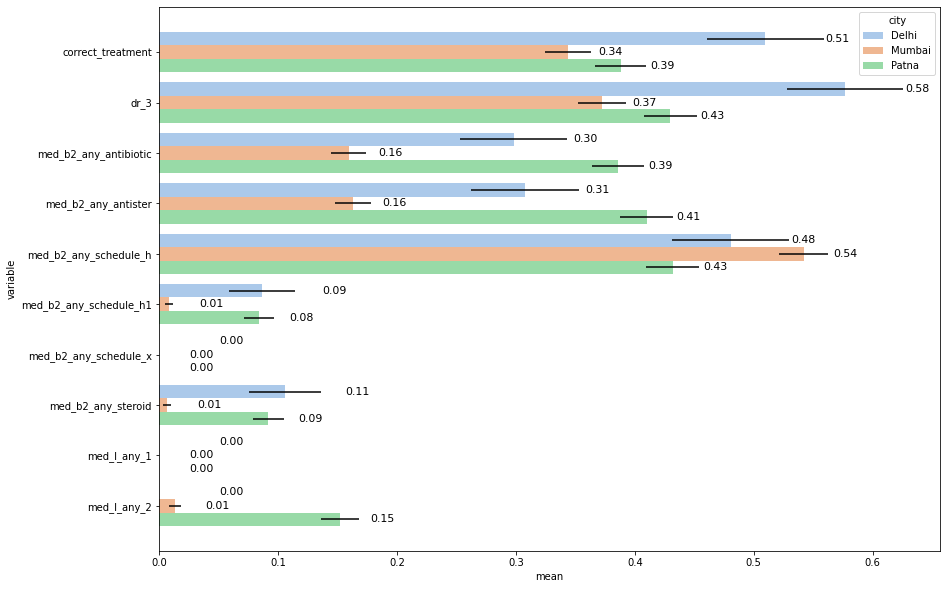

In [26]:
# Plot

dataf = dataf.sort_values(['city', 'variable'])
plt.figure(figsize=(14,10))

ax = sns.barplot(data=dataf, y = 'variable', x ='mean', hue ='city', 
                 palette = 'pastel')

y_coords = [p.get_y() + 0.5 * p.get_height() for p in ax.patches]
x_coords = [p.get_width() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, xerr=dataf["sem"], fmt="none", c="k")

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 11, padding=60)
plt.bar_label(ax.containers[1], fmt='%.2f', fontsize = 11, padding=30)
plt.bar_label(ax.containers[2], fmt='%.2f', fontsize = 11, padding=30)

plt.show()


## Stacked

In [9]:
# Load an example data set

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/StackBarGraphs.dta?raw=true")


In [10]:
data['med_t'] = data.med_b2_antister_cat_1.astype(str).str.cat(data[['med_b2_antister_cat_2', 
                                                                     'med_b2_antister_cat_3',
                                                                    'med_b2_antister_cat_4',
                                                                    'med_b2_antister_cat_5']].astype(str), sep = '.')

data["med_t"] = data["med_t"].astype("category")
data["med_t"] = data["med_t"].cat.rename_categories(["No antibiotic or steroid", 
                                                     "Antibiotic and steroid",
                                                    "Steroid",
                                                    "No medication",
                                                    "Antibiotic"])


<Figure size 1000x700 with 0 Axes>

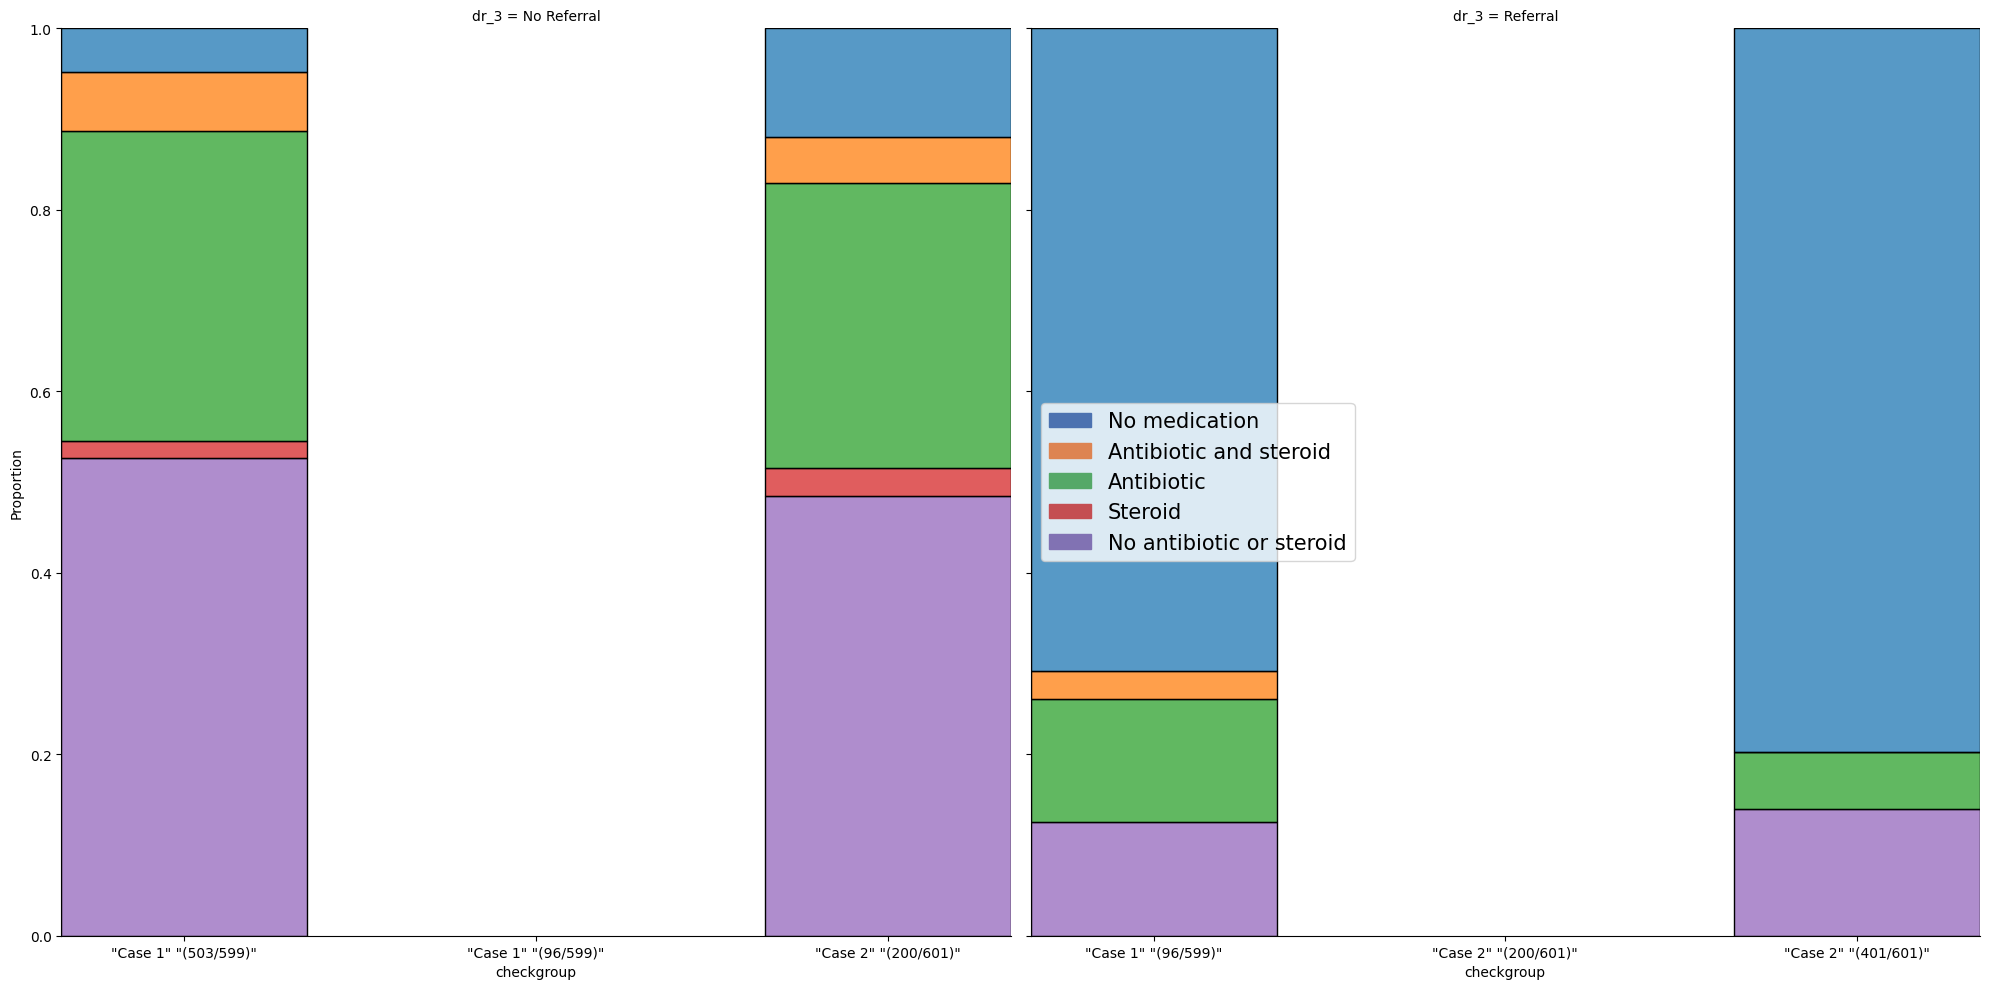

In [23]:
plt.figure(figsize=(10,7))

hue_order = data.med_t.unique()[::-1]

g = sns.FacetGrid(data, col = "dr_3", height=10, sharex=False);
g.map_dataframe(sns.histplot, data = data, x = "checkgroup", hue = "med_t",
                multiple="fill", stat="proportion", discrete=True, shrink= 0.7)

labels = hue_order
colors = sns.color_palette('deep').as_hex()[:len(labels)]
handles = [patches.Patch(color = col, label = lab) for col, lab in zip(colors, labels)]
plt.legend(handles = handles, title = '', loc = 'center left', fontsize = 15)
plt.show();
